In [75]:
# 신뢰성 문제와 거짓 정보 전파, 윤리적 고민과 규제 도전
# -딥페이크, AI목소리

# 과기정통부, 국내 AI신뢰성 인증기업 : https://www.newsis.com/view/?id=NISX20240206_0002618180&cID=13007&pID=13100
# 한국정보통신기술협회(TTA)  : 신뢰성 인증제도

title 개수: 10
title 개수: 20
title 개수: 30
title 개수: 40
title 개수: 50
title 개수: 60
title 개수: 70
title 개수: 80
title 개수: 90
title 개수: 100
title 개수: 110
title 개수: 120
title 개수: 130
title 개수: 140
title 개수: 150
title 개수: 160
title 개수: 170
title 개수: 180
title 개수: 190
title 개수: 200
[('韓', 'Foreign'), ('美', 'Foreign'), ('AI', 'Alpha'), ('연구', 'Noun'), ('거점', 'Noun'), ('만들고', 'Verb'), (',', 'Punctuation'), ('‘', 'Foreign'), ('온', 'Modifier'), ('디바이스', 'Noun'), ('AI', 'Alpha'), ('전략', 'Noun'), ('’', 'Punctuation'), ('내놓는다', 'Verb')]
--------------------------------------------------------------------------------
[('"', 'Punctuation'), ('AI', 'Alpha'), ('기반', 'Noun'), ('경제', 'Noun'), ('·', 'Punctuation'), ('산업', 'Noun'), ('대', 'Modifier'), ('도약', 'Noun'), ('···', 'Punctuation'), ('글로벌', 'Noun'), ('디지털', 'Noun'), ('질서', 'Noun'), ('주도', 'Noun'), ('"', 'Punctuation')]
--------------------------------------------------------------------------------
[('엘리스', 'Noun'), ('그룹', 'Noun'), ('AI', 'Alpha'), ('교육',

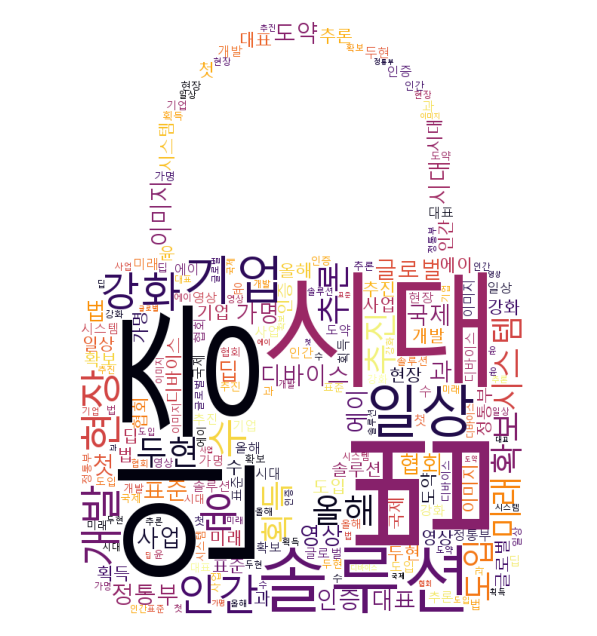

In [102]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import platform
import numpy as np
from PIL import Image

def get_titles(start_num, end_num, search_word, title_list):
    # start_num ~ end_num까지 크롤링
    while start_num <= end_num:
        url = ('https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start={}'.
        format(search_word, start_num))
        req = requests.get(url)
        time.sleep(1)
        if req.ok: # 정상적인 request 확인
            soup = BeautifulSoup(req.text, 'html.parser')
            news_titles = soup.find_all('a', {'class': 'news_tit'})
            for news in news_titles:
                title_list.append(news['title'])
        start_num += 10
        print('title 개수:', len(title_list))
    return title_list
        
def make_wordcloud(title_list, stopwords, word_count): # 딕셔너리로 만듦
    okt = Okt()
    sentences_tag = []
    # 형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = okt.pos(sentence) # 품사를 각각 파악, morph에는 형태소와 품사 정보가 담김
        sentences_tag.append(morph)
        print(morph)
        print('-' * 80)
    noun_adj_list = []
    # 명사와 형용사만 구분하여 리스트에 추가
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
    # 형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print('-' * 80)
    print(tags)
    tag_dict = dict(tags)
    # 검색어 제외 방법 2: dict에서 해당 검색어 제거
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    print(tag_dict)
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    img_mask = np.array(Image.open('lock.png'))
    wordcloud = WordCloud(font_path=path, width=800, height=600,
    background_color="white", max_font_size=200,
    repeat=True,
    colormap='inferno', mask=img_mask)
    cloud = wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
    
if __name__ == '__main__':
    search_word = "AI,인공지능 신뢰성" # 검색어 지정
    title_list = []
    stopwords = [search_word, '데이터','인공','지능','신뢰','처리','기술','기반','산업','생','아이','도','위','티','확산'] # wordcloud에서 제외할 단어
    # 1~200번게시글 까지 크롤링
    data_list=get_titles(1, 200, search_word, title_list)
    # 단어 50개까지 wordcloud로 출력
    make_wordcloud(title_list, stopwords, 50)
    

In [77]:
#1.내용 비교: 크롤링한 다수의 문서 간의 유사도를 분석하여 특정 주제나 내용이 얼마나 비슷한지 측정합니다.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 예시 문서 데이터
documents = data_list
# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# 코사인 유사도 계산
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# 출력
for i in range(len(documents)):
    for j in range(i+1, len(documents)):
        print(f"Similarity between Document {i+1} and Document {j+1}: {cosine_similarities[i][j]}")


Similarity between Document 1 and Document 2: 0.0
Similarity between Document 1 and Document 3: 0.0
Similarity between Document 1 and Document 4: 0.0
Similarity between Document 1 and Document 5: 0.0
Similarity between Document 1 and Document 6: 0.0
Similarity between Document 1 and Document 7: 0.0
Similarity between Document 1 and Document 8: 0.0
Similarity between Document 1 and Document 9: 0.18382980947277205
Similarity between Document 1 and Document 10: 0.0
Similarity between Document 1 and Document 11: 0.0
Similarity between Document 1 and Document 12: 0.0
Similarity between Document 1 and Document 13: 0.0
Similarity between Document 1 and Document 14: 0.0
Similarity between Document 1 and Document 15: 0.0
Similarity between Document 1 and Document 16: 0.0
Similarity between Document 1 and Document 17: 0.0
Similarity between Document 1 and Document 18: 0.0
Similarity between Document 1 and Document 19: 0.0
Similarity between Document 1 and Document 20: 0.0
Similarity between Docu

In [78]:
data_list

['韓 美 AI연구거점 만들고, ‘온디바이스AI 전략’ 내놓는다',
 '"AI 기반 경제·산업 대도약···글로벌 디지털 질서 주도"',
 '엘리스그룹 AI 교육 플랫폼, CSAP 인증 표준등급 획득',
 'AI 공존시대 연다…신뢰성 검·인증제도 활성화 추진',
 '과기정통부 “교육‧의료‧법률 분야 AI 확산에 7700억 투입”',
 '정부, 국내 AI 신뢰성 인증기업 1·2호에 마크애니·엔플럭스 선정',
 '글로벌 완성차 업체 겨냥한 韓기업의 인공지능 기술은?',
 '세계 AI 석학 얀 르쿤, “고양이 보다 못한 현 AI, 미래 종말 없다”',
 '과기정통부, 온디바이스 AI 활성화 전략 추진한다',
 '[우리가 AX 주역]〈5〉셀렉트스타, AI 종합 솔루션 기업으로 도약',
 "'온디바이스 AI 르네상스'...반도체·빅테크기업, 온디바이스 AI로 모인다",
 '“2024, 조지 오웰” 직원 감시에 이용되는 AI',
 '인공지능의 직관: Intuition of AI',
 'CCTV 영상 데이터 AI 학습 시 흉터·문신 지워야 할까',
 '“미리 보는 2030년” 6G가 AI를 만났을 때 생기는 변화',
 '"국내 인공지능(AI) 신약개발 경쟁력 낮다"',
 "AI신뢰성 위한 국제 연대 'TRAIN', 첫 행보 나선다",
 '[이용호의 시니어 인공지능] AI를 이용한 불법 복제 이미지 이제 디지털 워터마크로 찾는다',
 '정보통신자격협회·(주)인텍, 강원권 IT·AI 분야 협력 강화',
 "딥브레인AI, '딥보이스' 탐지 기술 특허 출원",
 'AI신뢰성협회, 창립 총회 개최…회장에 권원일 대표 선임',
 "TTA, 조직개편…'AI신뢰성센터' 신설",
 "'신뢰할 수 있는 AI 만들자' 국제 연대 'TRAIN' 출범",
 '슈퍼브에이아이, 리벨리온과 AI 반도체 연계 사업 함께 진행',
 'AI 스며든 은행, 금융서비스 미래는?',
 "'AI 신뢰성' 강화 위한 민간 영역 움직임 '잰걸음'",
 '국내 첫 민간 자율 AI 신뢰성 인증…마크애니·엔플럭스',
 "글

In [79]:
# 5. Non-Negative Matrix Factorization (NMF): 문서와 단어 간의 행렬을 분해하여 주제를 추출하는 방법 중 하나입니다.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 예시 문서 데이터
documents = data_list

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# NMF 모델 생성
num_topics = 4  # 주제의 수를 설정
nmf_model = NMF(n_components=num_topics, random_state=42)

# NMF 모델을 이용하여 문서-단어 행렬 분해
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# 주제와 연관된 단어 출력
feature_names = vectorizer.get_feature_names_out()
topic_words = []
topic_list=[]
for topic_idx, topic in enumerate(nmf_model.components_):
    top_word_indices = topic.argsort()[-5:][::-1]  # 각 주제별 상위 5개 단어 선택
    top_words = [feature_names[i] for i in top_word_indices]
    topic_words.append(top_words)
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")
    topic_list.append(', '.join(top_words))
# 문서별 주제 할당
doc_topic_assignments = nmf_model.transform(tfidf_matrix)
print("\nDocument-Topic Assignments:")
arg_list=[]
for i, doc_topic in enumerate(doc_topic_assignments):
    print(f"Document #{i + 1}: Topic #{doc_topic.argmax() + 1}")
    arg_list.append(doc_topic.argmax() + 1)
counts = Counter(arg_list)

Topic #1: 인증, 획득, 인공지능, 이지서티, 개인정보보호
Topic #2: 윤두현, 인공지능법, 의원, 처리, 조속히
Topic #3: 시대, 음성, 영상, 이미지, 가명처리
Topic #4: ai, 일상화, 추진, 어떤데, 쇼핑메이트로

Document-Topic Assignments:
Document #1: Topic #4
Document #2: Topic #4
Document #3: Topic #1
Document #4: Topic #4
Document #5: Topic #4
Document #6: Topic #4
Document #7: Topic #1
Document #8: Topic #4
Document #9: Topic #4
Document #10: Topic #4
Document #11: Topic #4
Document #12: Topic #4
Document #13: Topic #4
Document #14: Topic #3
Document #15: Topic #3
Document #16: Topic #1
Document #17: Topic #4
Document #18: Topic #3
Document #19: Topic #4
Document #20: Topic #4
Document #21: Topic #4
Document #22: Topic #4
Document #23: Topic #4
Document #24: Topic #4
Document #25: Topic #4
Document #26: Topic #4
Document #27: Topic #1
Document #28: Topic #4
Document #29: Topic #1
Document #30: Topic #4
Document #31: Topic #4
Document #32: Topic #4
Document #33: Topic #4
Document #34: Topic #4
Document #35: Topic #4
Document #36: Topic #4
Document #37: 

In [80]:
import pandas as pd
print(counts)
print(dict(counts))
df=pd.DataFrame([dict(counts)])
df=df[[1,2,3,4]]
df

Counter({4: 140, 3: 26, 1: 24, 2: 10})
{4: 140, 1: 24, 3: 26, 2: 10}


,1,2,3,4
0,24,10,26,140


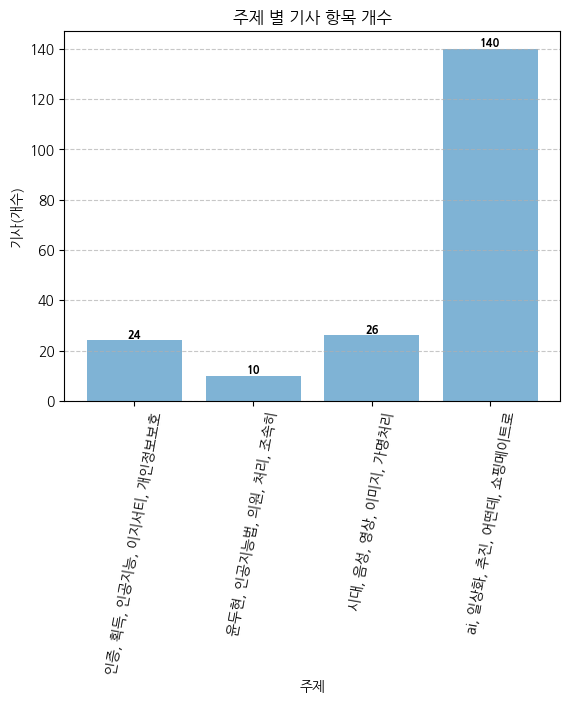

In [81]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 주어진 데이터
x = df.columns
y = df.loc[0]

# 그래프 그리기
plt.bar(x, y, color='#7FB3D5')  # 색상을 온화한 파란색으로 지정
plt.xlabel('주제')  # x축 레이블 변경
plt.ylabel('기사(개수)')  # y축 레이블 변경
plt.title('주제 별 기사 항목 개수')  # 그래프 제목 변경
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축에 그리드 적용
plt.xticks(range(1,5), topic_list, rotation=80)

# 그래프에 수치 표시
for i, v in enumerate(y, start=1):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.show()
# 삼성전기, 전장(1등)
# 인증, 민간, 강화(2등)

In [82]:
# pip install textblob
# 3.감정 추출: 크롤링한 텍스트 데이터에서 감정을 추출하여 긍정, 부정, 중립 등을 판단합니다.
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')  # VADER Lexicon 다운로드

def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)

    # VADER 점수를 기준으로 감정을 판단
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return "긍정적인 감정"
    elif compound_score > -0.05 and compound_score < 0.05:
        return "중립적인 감정"
    else:
        return "부정적인 감정"

# 테스트용 텍스트
sample_text = "이 영화는 정말로 훌륭하다!"


# 감정 추출 실행
for i in data_list:
    result = analyze_sentiment_vader(i)
    print(f"{i}의 감정 상태: {result}")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mathn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


韓 美 AI연구거점 만들고, ‘온디바이스AI 전략’ 내놓는다의 감정 상태: 중립적인 감정
"AI 기반 경제·산업 대도약···글로벌 디지털 질서 주도"의 감정 상태: 중립적인 감정
엘리스그룹 AI 교육 플랫폼, CSAP 인증 표준등급 획득의 감정 상태: 중립적인 감정
AI 공존시대 연다…신뢰성 검·인증제도 활성화 추진의 감정 상태: 중립적인 감정
과기정통부 “교육‧의료‧법률 분야 AI 확산에 7700억 투입”의 감정 상태: 중립적인 감정
정부, 국내 AI 신뢰성 인증기업 1·2호에 마크애니·엔플럭스 선정의 감정 상태: 중립적인 감정
글로벌 완성차 업체 겨냥한 韓기업의 인공지능 기술은?의 감정 상태: 중립적인 감정
세계 AI 석학 얀 르쿤, “고양이 보다 못한 현 AI, 미래 종말 없다”의 감정 상태: 중립적인 감정
과기정통부, 온디바이스 AI 활성화 전략 추진한다의 감정 상태: 중립적인 감정
[우리가 AX 주역]〈5〉셀렉트스타, AI 종합 솔루션 기업으로 도약의 감정 상태: 중립적인 감정
'온디바이스 AI 르네상스'...반도체·빅테크기업, 온디바이스 AI로 모인다의 감정 상태: 중립적인 감정
“2024, 조지 오웰” 직원 감시에 이용되는 AI의 감정 상태: 중립적인 감정
인공지능의 직관: Intuition of AI의 감정 상태: 중립적인 감정
CCTV 영상 데이터 AI 학습 시 흉터·문신 지워야 할까의 감정 상태: 중립적인 감정
“미리 보는 2030년” 6G가 AI를 만났을 때 생기는 변화의 감정 상태: 중립적인 감정
"국내 인공지능(AI) 신약개발 경쟁력 낮다"의 감정 상태: 중립적인 감정
AI신뢰성 위한 국제 연대 'TRAIN', 첫 행보 나선다의 감정 상태: 중립적인 감정
[이용호의 시니어 인공지능] AI를 이용한 불법 복제 이미지 이제 디지털 워터마크로 찾는다의 감정 상태: 중립적인 감정
정보통신자격협회·(주)인텍, 강원권 IT·AI 분야 협력 강화의 감정 상태: 중립적인 감정
딥브레인AI, '딥보이스' 탐지 기술 특허 출원의 감정 상태: 중립적인 감정

In [83]:
# 네이버 클로바 : https://medium.com/naver-cloud-platform/%EC%9D%B4%EB%A0%87%EA%B2%8C-%EC%82%AC%EC%9A%A9%ED%95%98%EC%84%B8%EC%9A%94-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EA%B0%90%EC%A0%95-%EB%B6%84%EC%84%9D-%EC%84%9C%EB%B9%84%EC%8A%A4-%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0-clova-sentiment-%ED%99%9C%EC%9A%A9%EA%B8%B0-5d9db7b0209b



In [84]:
from nltk.corpus import wordnet as wn 

the_word = "present"

# 'present'라는 단어로 `wordnet`의 `synsets` 생성
synsets = wn.synsets(the_word)
print('synsets() 반환 type :', type(synsets))
print('synsets() 반환 값 개수 :', len(synsets))
print('synsets() 반환 값 :', synsets)

synsets() 반환 type : <class 'list'>
synsets() 반환 값 개수 : 18
synsets() 반환 값 : [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [85]:
for synset in synsets:
  print("#### Synset name :", synset.name(), "####")
  print("POS :", synset.lexname())
  print('Definition:', synset.definition())
  print('Lemmas:', synset.lemma_names())

#### Synset name : present.n.01 ####
POS : noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
#### Synset name : present.n.02 ####
POS : noun.possession
Definition: something presented as a gift
Lemmas: ['present']
#### Synset name : present.n.03 ####
POS : noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
#### Synset name : show.v.01 ####
POS : verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
#### Synset name : present.v.02 ####
POS : verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
#### Synset name : stage.v.01 ####
POS : verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represent']
#### Synset na

In [86]:
# 유사도 측정
import pandas as pd
plant = wn.synset('plant.n.01')
rabbit = wn.synset('rabbit.n.01')
lion = wn.synset('lion.n.01')
horse = wn.synset('horse.n.01')
dog = wn.synset('dog.n.01')

entities = [plant, rabbit, lion, horse, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별 synset을 반복하면서 다른 단어의 `synset`과 유사도를 측정함
for entity in entities:
  similarity = [round(entity.path_similarity(compared_entity), 2) for compared_entity in entities]
  similarities.append(similarity)

# 개별 단어별 synset과 다른 단어의 `synset`과의 유사도를 `DataFrame` 형태로 저장
similarity_df = pd.DataFrame(similarities, columns = entity_names, index = entity_names)
similarity_df

,plant,rabbit,lion,horse,dog
plant,1.00,0.07,0.06,0.06,0.10
rabbit,0.07,1.00,0.12,0.12,0.14
lion,0.06,0.12,1.00,0.11,0.17
horse,0.06,0.12,0.11,1.00,0.12
dog,0.10,0.14,0.17,0.12,1.00


In [87]:
import nltk

from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수: ', fabulous.pos_score())
print('fabulous 부정감성 지수: ', fabulous.neg_score())
print('fabulous 객관성 지수: ', fabulous.obj_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0


fabulous 긍정감성 지수:  0.875
fabulous 부정감성 지수:  0.125
fabulous 객관성 지수:  0.0


In [88]:
from nltk.corpus import wordnet as wn

# 간단한 NLTK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
  if tag.startswith('J'):
    return wn.ADJ
  elif tag.startswith('N'):
    return wn.NOUN
  elif tag.startswith('R'):
    return wn.ADV
  elif tag.startswith('V'):
    return wn.VERB

In [89]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [90]:
swn_polarity("sad")

0

In [91]:
data_list

['韓 美 AI연구거점 만들고, ‘온디바이스AI 전략’ 내놓는다',
 '"AI 기반 경제·산업 대도약···글로벌 디지털 질서 주도"',
 '엘리스그룹 AI 교육 플랫폼, CSAP 인증 표준등급 획득',
 'AI 공존시대 연다…신뢰성 검·인증제도 활성화 추진',
 '과기정통부 “교육‧의료‧법률 분야 AI 확산에 7700억 투입”',
 '정부, 국내 AI 신뢰성 인증기업 1·2호에 마크애니·엔플럭스 선정',
 '글로벌 완성차 업체 겨냥한 韓기업의 인공지능 기술은?',
 '세계 AI 석학 얀 르쿤, “고양이 보다 못한 현 AI, 미래 종말 없다”',
 '과기정통부, 온디바이스 AI 활성화 전략 추진한다',
 '[우리가 AX 주역]〈5〉셀렉트스타, AI 종합 솔루션 기업으로 도약',
 "'온디바이스 AI 르네상스'...반도체·빅테크기업, 온디바이스 AI로 모인다",
 '“2024, 조지 오웰” 직원 감시에 이용되는 AI',
 '인공지능의 직관: Intuition of AI',
 'CCTV 영상 데이터 AI 학습 시 흉터·문신 지워야 할까',
 '“미리 보는 2030년” 6G가 AI를 만났을 때 생기는 변화',
 '"국내 인공지능(AI) 신약개발 경쟁력 낮다"',
 "AI신뢰성 위한 국제 연대 'TRAIN', 첫 행보 나선다",
 '[이용호의 시니어 인공지능] AI를 이용한 불법 복제 이미지 이제 디지털 워터마크로 찾는다',
 '정보통신자격협회·(주)인텍, 강원권 IT·AI 분야 협력 강화',
 "딥브레인AI, '딥보이스' 탐지 기술 특허 출원",
 'AI신뢰성협회, 창립 총회 개최…회장에 권원일 대표 선임',
 "TTA, 조직개편…'AI신뢰성센터' 신설",
 "'신뢰할 수 있는 AI 만들자' 국제 연대 'TRAIN' 출범",
 '슈퍼브에이아이, 리벨리온과 AI 반도체 연계 사업 함께 진행',
 'AI 스며든 은행, 금융서비스 미래는?',
 "'AI 신뢰성' 강화 위한 민간 영역 움직임 '잰걸음'",
 '국내 첫 민간 자율 AI 신뢰성 인증…마크애니·엔플럭스',
 "글

In [92]:
#pip install googletrans==4.0.0-rc1
from googletrans import Translator
nltk.download('vader_lexicon')  # VADER Lexicon 다운로드
total_list=[]
def translate_list_elements(input_list, target_language='en'):
    translator = Translator()
    translation_result = []

    for element in input_list:
        translation = translator.translate(element, dest=target_language).text
        translation_result.append({element: translation})

    return translation_result

# 예시 리스트
#original_list = data_list[0:20]

# 번역 실행
for i in data_list:
    translated_dict_list = translate_list_elements([i])
    total_list.append(translated_dict_list)
# # 결과 출력
# for translation_dict in translated_dict_list:
#     print(translation_dict)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mathn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [93]:
total_list

[[{'韓 美 AI연구거점 만들고, ‘온디바이스AI 전략’ 내놓는다': '韓 US AI research base, “On -Vice AI Strategy”'}],
 [{'"AI 기반 경제·산업 대도약···글로벌 디지털 질서 주도"': '"AI -based economy and industrial leap ··'}],
 [{'엘리스그룹 AI 교육 플랫폼, CSAP 인증 표준등급 획득': 'Ellis Group AI Education Platform, CSAP Certification Standard Rating Acquisition'}],
 [{'AI 공존시대 연다…신뢰성 검·인증제도 활성화 추진': 'Open the AI coexistence…Promotion of reliability inspection and certification system'}],
 [{'과기정통부 “교육‧의료‧법률 분야 AI 확산에 7700억 투입”': 'The Ministry of Information and Communication “Introduced 770 billion in the spread of AI in education, medical, and law.”'}],
 [{'정부, 국내 AI 신뢰성 인증기업 1·2호에 마크애니·엔플럭스 선정': 'The government selects Mark Annie and Enplux as domestic AI reliability certification companies 1 and 2'}],
 [{'글로벌 완성차 업체 겨냥한 韓기업의 인공지능 기술은?': 'What is the artificial intelligence technology of a global automaker?'}],
 [{'세계 AI 석학 얀 르쿤, “고양이 보다 못한 현 AI, 미래 종말 없다”': 'The world AI scholar Jan Leckun, “The current AI, which is worse than a cat, no future e

In [94]:
emotional_result=dict()
for i in total_list:
    if swn_polarity(list(i[0].values())[0]) :
        emotional_result.setdefault(list(i[0].items())[0][0], 1)
    else :
        emotional_result.setdefault(list(i[0].items())[0][0], 0)

In [95]:
emotional_result

{'韓 美 AI연구거점 만들고, ‘온디바이스AI 전략’ 내놓는다': 1,
 '"AI 기반 경제·산업 대도약···글로벌 디지털 질서 주도"': 1,
 '엘리스그룹 AI 교육 플랫폼, CSAP 인증 표준등급 획득': 1,
 'AI 공존시대 연다…신뢰성 검·인증제도 활성화 추진': 1,
 '과기정통부 “교육‧의료‧법률 분야 AI 확산에 7700억 투입”': 1,
 '정부, 국내 AI 신뢰성 인증기업 1·2호에 마크애니·엔플럭스 선정': 1,
 '글로벌 완성차 업체 겨냥한 韓기업의 인공지능 기술은?': 1,
 '세계 AI 석학 얀 르쿤, “고양이 보다 못한 현 AI, 미래 종말 없다”': 0,
 '과기정통부, 온디바이스 AI 활성화 전략 추진한다': 1,
 '[우리가 AX 주역]〈5〉셀렉트스타, AI 종합 솔루션 기업으로 도약': 1,
 "'온디바이스 AI 르네상스'...반도체·빅테크기업, 온디바이스 AI로 모인다": 1,
 '“2024, 조지 오웰” 직원 감시에 이용되는 AI': 1,
 '인공지능의 직관: Intuition of AI': 0,
 'CCTV 영상 데이터 AI 학습 시 흉터·문신 지워야 할까': 1,
 '“미리 보는 2030년” 6G가 AI를 만났을 때 생기는 변화': 1,
 '"국내 인공지능(AI) 신약개발 경쟁력 낮다"': 1,
 "AI신뢰성 위한 국제 연대 'TRAIN', 첫 행보 나선다": 1,
 '[이용호의 시니어 인공지능] AI를 이용한 불법 복제 이미지 이제 디지털 워터마크로 찾는다': 1,
 '정보통신자격협회·(주)인텍, 강원권 IT·AI 분야 협력 강화': 1,
 "딥브레인AI, '딥보이스' 탐지 기술 특허 출원": 1,
 'AI신뢰성협회, 창립 총회 개최…회장에 권원일 대표 선임': 1,
 "TTA, 조직개편…'AI신뢰성센터' 신설": 1,
 "'신뢰할 수 있는 AI 만들자' 국제 연대 'TRAIN' 출범": 0,
 '슈퍼브에이아이, 리벨리온과 AI 반도체 연계 사업 함께 진행': 1,
 'AI 스며든 은행, 금융서비스 미래는?': 1

In [96]:
import pandas as pd
df = pd.DataFrame(emotional_result.items(), columns=['title', 'result'])
df

,title,result
0,"韓 美 AI연구거점 만들고, ‘온디바이스AI 전략’ 내놓는다",1
1,"""AI 기반 경제·산업 대도약···글로벌 디지털 질서 주도""",1
2,"엘리스그룹 AI 교육 플랫폼, CSAP 인증 표준등급 획득",1
3,AI 공존시대 연다…신뢰성 검·인증제도 활성화 추진,1
4,과기정통부 “교육‧의료‧법률 분야 AI 확산에 7700억 투입”,1
...,...,...
128,[김두식의 이코노믹스] 기술 혁신과 합리적 규제 함께 가야 AI산업 큰다,1
129,"국회 문턱 못 넘고 있는 AI 관련 법안, 윤두현 ""21대 국회 임기 내 반드시 처...",0
130,"인공지능으로 인간 추론 능력 극대화!...KAIST 이상완 교수팀, 인간의 원샷 추...",1
131,"과기정통부, AI 일상화 위한 릴레이 현장소통 추진",1


In [104]:
result=df["result"].value_counts()

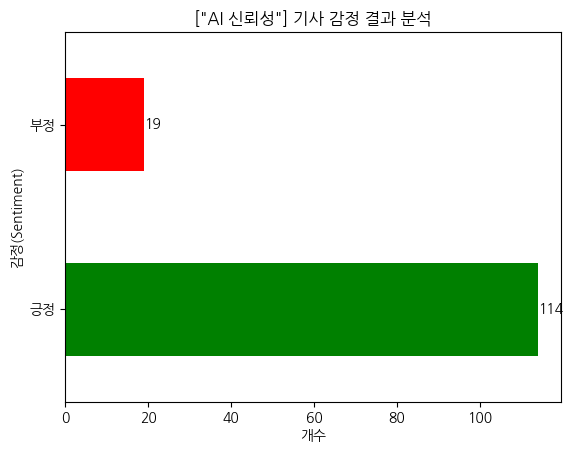

In [105]:
import matplotlib.pyplot as plt

# 주어진 Series
result_series = result

# 그래프 그리기
colors = ['green', 'red']  # 긍정은 녹색, 부정은 빨강색
ax = result_series.plot(kind='barh', color=colors)

plt.xlabel('개수')
plt.ylabel('감정(Sentiment)')
plt.yticks(range(2),["긍정","부정"])
plt.title('["AI 신뢰성"] 기사 감정 결과 분석')

# 각 막대 위에 값 표시
for index, value in enumerate(result_series):
    plt.text(value, index, str(value), va='center')

plt.show()
